# Data visualization with matplotlib
#### https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

In [1]:
#Importing the library.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests # For data scraping
import lxml.html as lh # For data scraping
import datapackage

In [2]:
titanic_vis = pd.read_csv('train_titanic.csv')
titanic_vis.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_age =  pd.pivot_table(data=titanic_vis, index='Embarked',values = 'Age', aggfunc='count')
titanic_age.head()

,Age
Embarked,
C,130
Q,28
S,554


In [4]:
titanic_vis['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

## Histograms:

A histogram takes in a series of data and divides the data into a number of bins. It then plots the frequency data points in each bin (i.e. the interval of points). It is useful in understanding the count of data ranges.

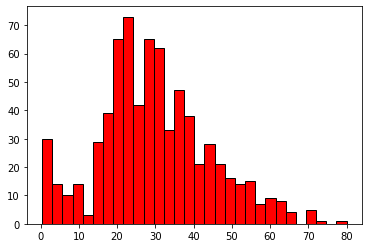

In [5]:

plt.hist(titanic_vis['Age'],
         facecolor = 'red',
         edgecolor = 'black',
         bins = 30,
         cumulative= False)
plt.show()

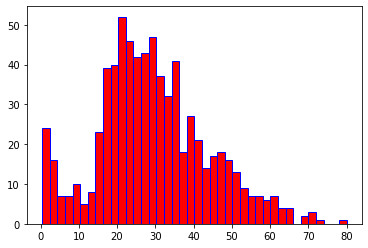

In [6]:
n, bins, patches = plt.hist(titanic_vis['Age'], facecolor = 'red', edgecolor = 'blue', bins = 40)

In [7]:
print('n: ', n) # Represent the maximum value of each bin
print('bins: ', bins) # Represent the middle value of each bin
print('patches: ', patches) # 

n:  [24. 16.  7.  7. 10.  5.  8. 23. 39. 40. 52. 46. 42. 43. 47. 37. 32. 41.
 18. 27. 21. 14. 17. 18. 16. 13.  9.  7.  7.  6.  7.  4.  4.  0.  2.  3.
  1.  0.  0.  1.]
bins:  [ 0.42    2.4095  4.399   6.3885  8.378  10.3675 12.357  14.3465 16.336
 18.3255 20.315  22.3045 24.294  26.2835 28.273  30.2625 32.252  34.2415
 36.231  38.2205 40.21   42.1995 44.189  46.1785 48.168  50.1575 52.147
 54.1365 56.126  58.1155 60.105  62.0945 64.084  66.0735 68.063  70.0525
 72.042  74.0315 76.021  78.0105 80.    ]
patches:  <BarContainer object of 40 artists>


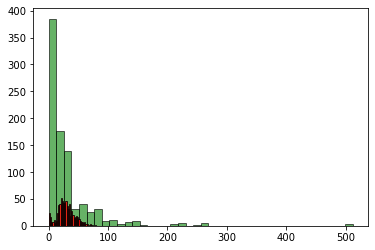

In [8]:
plt.hist(titanic_vis['Fare'],
        facecolor = 'green',
        edgecolor = 'black',
        bins = 40,
        alpha = 0.6)

plt.hist(titanic_vis['Age'],
        facecolor = 'red',
        edgecolor = 'black',
        bins = 40,
        alpha = 0.8)
plt.show()

## Pie chart

It is a circular plot which is divided into slices to illustrate numerical proportion. The slice of a pie chart is to show the proportion of parts out of a whole.
* When to use it: Pie chart should be used seldom used as It is difficult to compare sections of the chart. Bar plot is used instead as comparing sections is easy.


<span style="background-color: #FFFC00">**WARNING: The problem is that humans are pretty bad at reading angles. In the adjacent pie chart, try to figure out which group is the biggest one and try to order them by value. You will probably struggle to do so and this is why pie charts must be avoided.**</span>

In [9]:
titanic_piv =  pd.pivot_table(data=titanic_vis, index='Embarked',values = 'Survived', aggfunc='count')
titanic_piv.head()

,Survived
Embarked,
C,168
Q,77
S,644


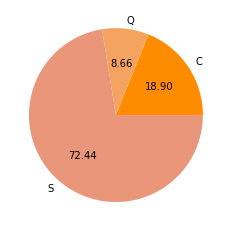

In [10]:
colors = ['darkorange','sandybrown','darksalmon']
plt.pie(titanic_piv['Survived'],
       labels = titanic_piv.index,
        colors= colors,
       autopct = '%.2f')
plt.show()

In [11]:
index_col = ['1st','2nd','3rd','4th','5th','8th','9th']
titanic_sibsp = pd.pivot_table(data  =titanic_vis,  index='SibSp', values = 'Survived', aggfunc='count')
titanic_sibsp['real_SibSp'] = index_col
titanic_sibsp = titanic_sibsp.set_index('real_SibSp')
titanic_sibsp

,Survived
real_SibSp,
1st,608
2nd,209
3rd,28
4th,16
5th,18
8th,5
9th,7


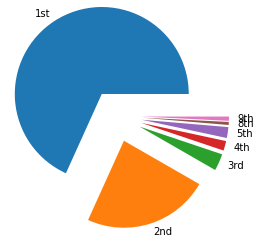

In [12]:
explode = np.zeros(7) +0.3
plt.pie(titanic_sibsp['Survived'],
       labels=titanic_sibsp.index,
       explode = explode)
plt.show()

## Now time series:

**When to use: Time Series should be used when single or multiple variables are to be plotted over time.**

In [26]:
ts_appl = pd.read_csv("archive/AAPL_2006-01-01_to_2018-01-01.csv")
ts_amz = pd.read_csv("archive/AMZN_2006-01-01_to_2018-01-01.csv")
ts_appl = ts_appl.head(100)
ts_amz  = ts_amz.head(100)

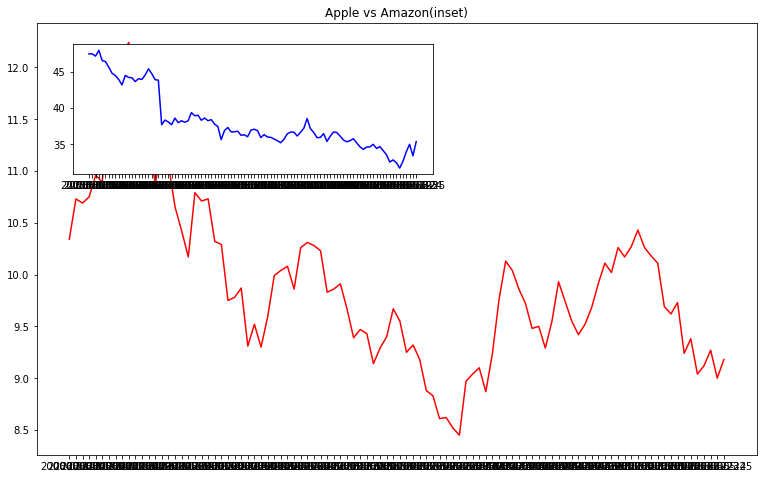

In [28]:
fig  =  plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.05,0.65,0.5,0.3])

ax1.set_title('Apple vs Amazon(inset)')

ax1.plot(ts_appl['Date'],
        ts_appl['Open'],
        color = 'red')

ax2.plot(ts_amz['Date'],
        ts_amz['Open'],
        color = 'blue')

plt.show()


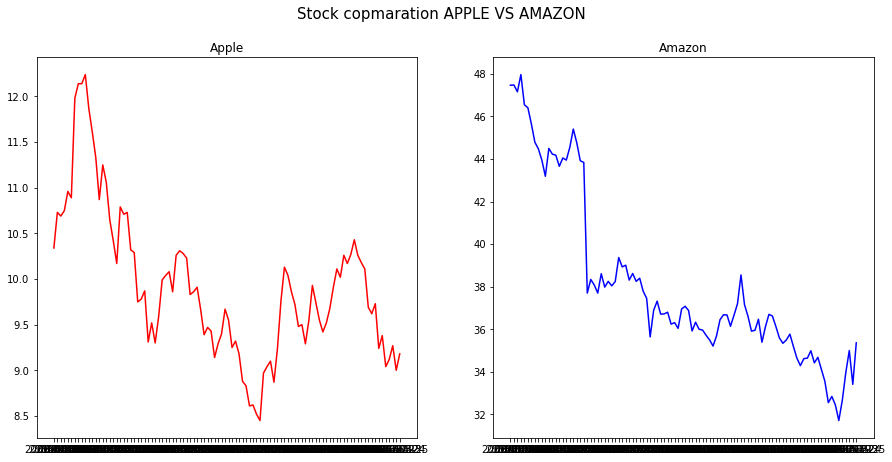

In [38]:
fig = plt.figure(figsize=(15,7))
fig.suptitle('Stock copmaration APPLE VS AMAZON',fontsize = 15)

#First axis, apple:
ax1 = fig.add_subplot(121)
ax1.set_title('Apple')

ax1.plot(ts_appl['Date'],
        ts_appl['Open'],
        color = 'red')

####################

#Now axis for amazon:

ax2 = fig.add_subplot(122)
ax2.set_title('Amazon')

ax2.plot(ts_amz['Date'],
        ts_amz['Open'],
        color = 'blue')

plt.show()
